## Deep Learning Dataset 6

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
import pandas as pd
import pandas as np

In [5]:
import os
import scipy.io as sio

In [6]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

In [7]:
from keras.utils import to_categorical

In [8]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [10]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [11]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [12]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/TS6_A.csv')

In [13]:
df_data1['label'] = 0

In [14]:
df_data2 = pd.read_csv('../DataFactory/FixedPlaintext/TS6_B.csv')

In [15]:
df_data2['label'] = 1

In [16]:
len(df_data1)

1000000

### Create Label

In [17]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [18]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [19]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [20]:
len(df_data)

2000000

In [21]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [22]:
df_label = df_label[:,-1]

### Split Label

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [25]:
y_train = to_categorical(y_train,num_classes=2)

In [26]:
y_test = to_categorical(y_test,num_classes=2)

In [28]:
import numpy as np

In [29]:
X_train = np.array(X_train)

In [30]:
y_train = np.array(y_train)

In [33]:
X_test = np.array(X_test)

In [34]:
y_test = np.array(y_test)

In [35]:
from keras import backend as k

In [36]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [37]:
tmpModel = createMLPModel()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [39]:
trainedModel = tmpModel.fit(x=[X_train[0:50000]],
                            y=y_train[0:50000],
                            batch_size=1000,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
50000/50000 [==============================] - 1s 15us/step - loss: 0.2503 - accuracy: 0.5075
Epoch 2/30
50000/50000 [==============================] - 1s 14us/step - loss: 0.2489 - accuracy: 0.5266
Epoch 3/30
50000/50000 [==============================] - 1s 14us/step - loss: 0.2476 - accuracy: 0.5392
Epoch 4/30
50000/50000 [==============================] - 1s 13us/step - loss: 0.2462 - accuracy: 0.5515
Epoch 5/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.2444 - accuracy: 0.5657
Epoch 6/30
50000/50000 [==============================] - 1s 15us/step - loss: 0.2421 - accuracy: 0.5777
Epoch 7/30
50000/50000 [==============================] - 1s 15us/step - loss: 0.2393 - accuracy: 0.5896
Epoch 8/30
50000/50000 [==============================] - 1s 16us/step - loss: 0.2360 - accuracy: 0.5999
Epoch 9/30
50000/50000 [==============================] - 1s 15us/step - loss: 0.2322 - accuracy: 0.6149
Epoch 10/30
50000/50000 [==============================

In [40]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [41]:
iterate = K.function([tmpModel.input], [gradient])

In [57]:
grad = iterate(np.array(X_test[0:5000],dtype=np.float128))

In [58]:
grad[0][0][0]

array([-4.4861821e-09, -2.8656100e-09, -5.0271818e-09,  6.1492131e-09,
        3.3826755e-09,  4.9789866e-09, -1.5605398e-09, -1.5235568e-09,
       -4.9123909e-09,  7.6119011e-10,  3.7795829e-09,  1.1150909e-09,
        1.0603016e-09, -5.1339630e-09,  1.6492172e-09, -1.4255835e-10,
       -2.0733881e-09, -4.8118407e-09,  3.1993237e-09,  4.1190273e-09,
       -1.9358473e-09,  2.2255839e-09, -1.4355319e-09, -5.6174057e-09,
       -2.1570163e-09,  6.3128200e-09, -1.1235365e-09, -5.1160387e-10,
       -1.5385282e-09, -4.2702535e-09,  4.5765391e-09,  4.5075699e-09,
        5.8807847e-09, -8.1850473e-09,  1.1614196e-09, -2.5444369e-09,
       -8.9144345e-09,  2.7900335e-10,  7.9859470e-09, -8.9543689e-10,
        5.4821272e-09, -2.5094213e-09,  2.6608959e-09, -8.3864082e-10,
        3.4714067e-09,  2.7005880e-09,  2.8080673e-09, -3.1037120e-09,
        3.3251673e-09,  7.0261255e-09], dtype=float32)

In [59]:
grad

[[array([[-4.4861821e-09, -2.8656100e-09, -5.0271818e-09, ...,
          -3.1037120e-09,  3.3251673e-09,  7.0261255e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

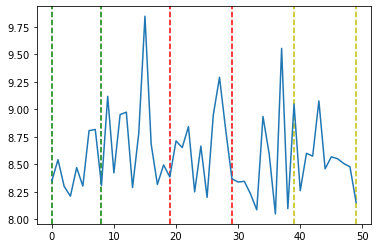

In [60]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')
plt.axvline(x=8, color='g', linestyle='--')
plt.axvline(x=39, color='y', linestyle='--')
plt.axvline(x=49, color='y', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

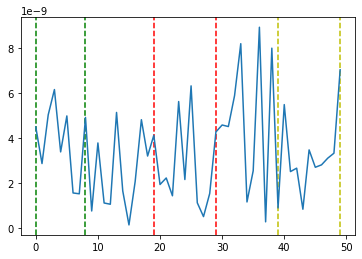

In [61]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')
plt.axvline(x=8, color='g', linestyle='--')
plt.axvline(x=39, color='y', linestyle='--')
plt.axvline(x=49, color='y', linestyle='--')
plt.plot(np.abs(grad[0][0][0]))
plt.show()